In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

import sys
sys.path.insert(0, '../src/')

from models.XPLORE import XPLORE, posteriors2coordinates
import models.visualization as vis

def show(n=0, q='answer_32214'):
    n = xplore.fit_reactions.index[n]
    fig, (ax1, ax2) = plt.subplots(1,2)

    train_colors = xplore.fit_users.map(candidates.color.to_dict())
    vis.plotEmbedding(xplore.embedding, n=n, c=train_colors, 
                      ax=ax1, highlight={'color':train_colors.loc[n]})

    user = xplore.fit_reactions.loc[n]
    # user.loc[:] = np.NaN
    answers = user.loc[~user.isna()]
    vis.plotObjective(xplore.posterior, answers, d=0, r=xplore.r, area=xplore.area, ax=ax1)

    x, y = xplore.embed(answers)
    ax1.scatter(x, y, marker='x', color='black', s=10, label='Optimized Coordinates', zorder=5)
    _ = ax1.set_title(f'MSE Loss Function for User {n}')

    rgba = vis.colormap(user.astype(float).loc[str(q)])
    vis.plotEmbedding(xplore.embedding, n=n, highlight={'color':rgba},
                    c=xplore.fit_reactions.loc[:,str(q)], ax=ax2)
    vis.plotFeature(xplore.predict, q, d=0, r=xplore.r, area=xplore.area, ax=ax2)
    _ = ax2.set_title(f'Probabilities for Feature {q}')
    print(questions.loc[q, 'question_EN'])
    print(xplore.fit_rmse, xplore.fit_accuracy)
    return fig, (ax1,ax2)

In [8]:
questions = pd.read_csv('../src/data/csv/questions.csv', index_col=0)
questions.ID_question = 'answer_' + questions.ID_question.astype(str)
questions = questions.set_index('ID_question')
questions

,question_DE,question_EN,rapide
ID_question,,,
answer_32214,Befürworten Sie eine Erhöhung des Rentenalters...,Do you support an increase in the retirement a...,1
answer_32215,Soll der Staat mehr Mittel für die Krankenkass...,Should the federal government allocate more fu...,1
answer_32216,Bei Ehepaaren ist die Höhe der Rente heute auf...,"For married couples, the pension is currently ...",0
answer_32217,Im Rahmen der BVG-Reform sollen die Renten gek...,As part of the reform of the BVG (occupational...,0
answer_32218,Soll die bezahlte Elternzeit von heute 14 Woch...,Should paid parental leave be increased beyond...,0
...,...,...,...
answer_32284,"Soll der Bund im Bereich ""Öffentlicher Verkehr...",Should the federal government spend more or le...,0
answer_32285,"Soll der Bund im Bereich ""Strassenverkehr (mot...",Should the federal government spend more or le...,0
answer_32286,"Soll der Bund im Bereich ""Öffentliche Sicherhe...",Should the federal government spend more or le...,0


In [9]:
reactions = pd.read_csv('../src/data/csv/reactions.csv', index_col=0)
reactions

,answer_32214,answer_32215,answer_32216,answer_32217,answer_32218,answer_32219,answer_32220,answer_32221,answer_32222,answer_32223,...,answer_32279,answer_32280,answer_32281,answer_32282,answer_32283,answer_32284,answer_32285,answer_32286,answer_32287,answer_32288
16,0.25,0.75,0.75,0.00,0.75,1.00,0.00,1.00,0.00,1.00,...,0.33,0.83,0.50,0.75,0.75,0.50,0.25,0.75,0.75,0.00
31,0.00,1.00,0.25,0.00,1.00,1.00,0.25,0.25,0.00,0.00,...,0.00,1.00,0.75,1.00,0.25,1.00,0.00,0.50,0.25,0.50
33,0.75,0.25,0.00,0.25,0.00,0.75,1.00,1.00,0.00,0.00,...,0.17,0.83,0.50,1.00,0.50,0.75,0.50,0.50,0.50,0.50
41,0.75,0.75,1.00,0.75,1.00,0.25,0.00,0.25,0.75,0.00,...,0.17,0.83,0.50,0.75,0.00,0.50,0.25,0.50,0.75,0.75
42,0.25,0.75,0.75,0.00,1.00,1.00,0.00,0.25,1.00,0.00,...,0.00,0.83,0.50,0.75,0.50,0.75,0.75,0.50,0.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.00,0.75,1.00,0.75,0.75,0.25,0.00,0.00,0.25,0.25,...,0.33,0.33,0.25,0.75,0.25,0.75,0.50,0.50,0.25,0.25
5908,0.75,0.25,0.00,1.00,0.25,0.00,0.00,0.00,1.00,0.00,...,0.33,0.67,0.25,0.50,0.00,0.50,0.25,0.50,0.25,0.25
5915,0.75,0.00,0.75,0.75,0.00,0.00,0.00,0.00,0.75,0.75,...,0.83,0.00,0.00,0.25,0.75,0.25,0.75,0.75,0.75,0.00
5921,1.00,0.75,0.75,1.00,1.00,0.25,0.00,0.00,0.25,0.00,...,0.17,1.00,0.75,0.75,0.25,0.25,0.50,0.50,0.75,0.50


In [10]:
candidates = pd.read_csv('../src/data/csv/candidates.csv', index_col=0)
candidates

,party_short,color,x,y,mu_x,mu_y,width,height,angle
16,GLP,#32CD32,0.085427,-0.396985,0.092042,-0.386780,0.192614,0.295833,-175.928981
31,SP,#FF0000,-0.738693,-0.125628,-0.756948,-0.146323,0.233534,0.329580,-174.898324
33,Die Mitte,#C56C46,-0.145729,-0.045226,-0.152688,-0.046806,0.173662,0.310245,-179.212170
41,GLP,#32CD32,-0.356784,0.457286,-0.353273,0.468202,0.176275,0.352144,-175.073151
42,Die Mitte,#C56C46,-0.356784,-0.005025,-0.364929,-0.012507,0.197671,0.306934,-171.703649
...,...,...,...,...,...,...,...,...,...
5905,Die Mitte,#C56C46,-0.115578,0.025126,-0.108110,0.021949,0.175929,0.310950,-179.137666
5908,GLP,#32CD32,-0.045226,0.417085,-0.039606,0.453762,0.185069,0.362250,-177.300565
5915,SVP,#4F7942,0.658291,-0.145729,0.656471,-0.162793,0.230306,0.314676,175.576418
5921,Die Mitte,#C56C46,-0.276382,0.105528,-0.279047,0.115624,0.182393,0.319760,-177.323526


In [11]:
xplore = XPLORE(reactions, 
                xmin=-1, xmax=1, resolution=200, 
                prior_cov=np.array([[.075, 0], [0, .075]])
                )
xplore.items.head()

,beta1,beta2,alpha
answer_32214,1.817253,-3.159123,-0.047741
answer_32215,-3.222970,1.080782,-0.075510
answer_32216,-0.496590,0.562496,-0.821258
answer_32217,2.816033,-3.668403,-0.905571
answer_32218,-4.286765,-0.045105,-0.196909


Do you support an increase in the retirement age (e.g., to 67)?
0.24487705401163923 0.7865755244755245


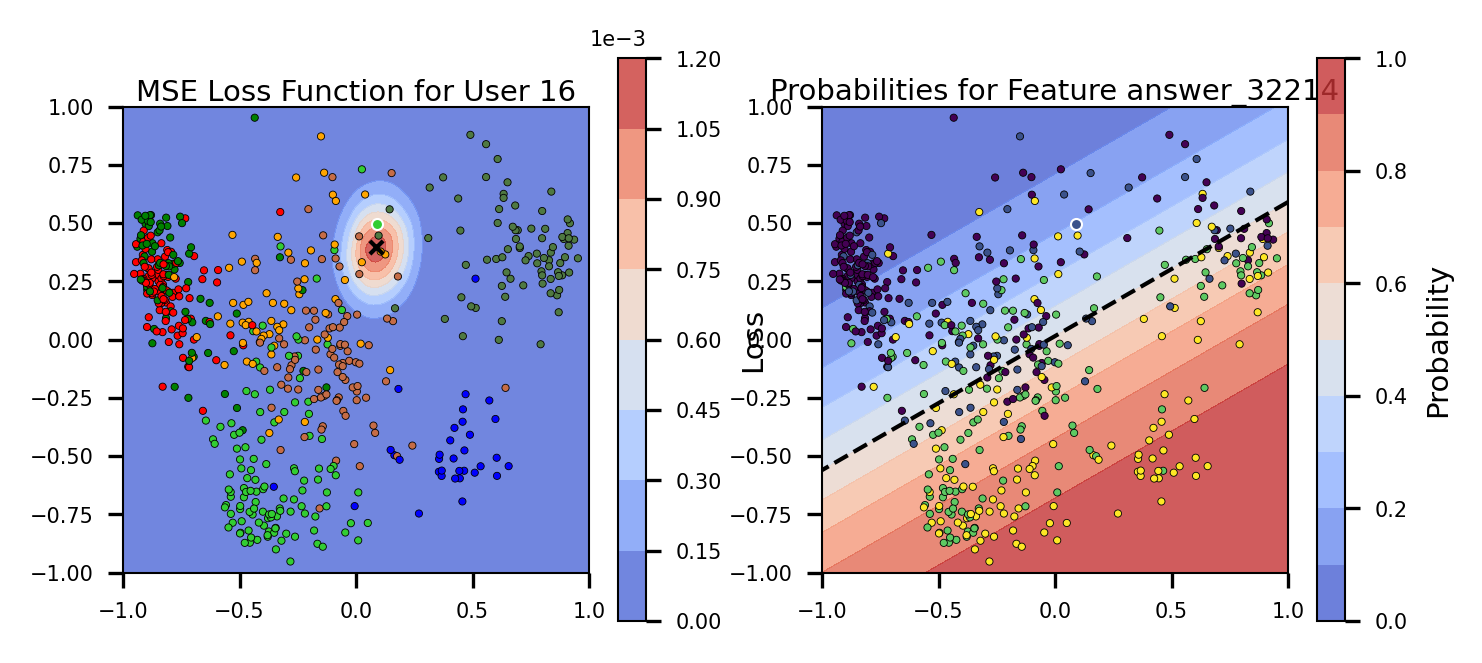

In [12]:
xplore.evaluate()

q1='answer_32214'
q2='answer_32215'
q3='answer_32268'
q4='answer_32245'

_ = show(n=0, q=q1)

In [13]:
xplore.items.beta2 = -xplore.items.beta2
xplore.likelihood_X = pd.DataFrame(xplore.predict(xplore.X), columns = xplore.items.index)
xplore.computePosteriors()

Should the federal government allocate more funding for health insurance premium subsidies?
0.24487705401163923 0.7865755244755245


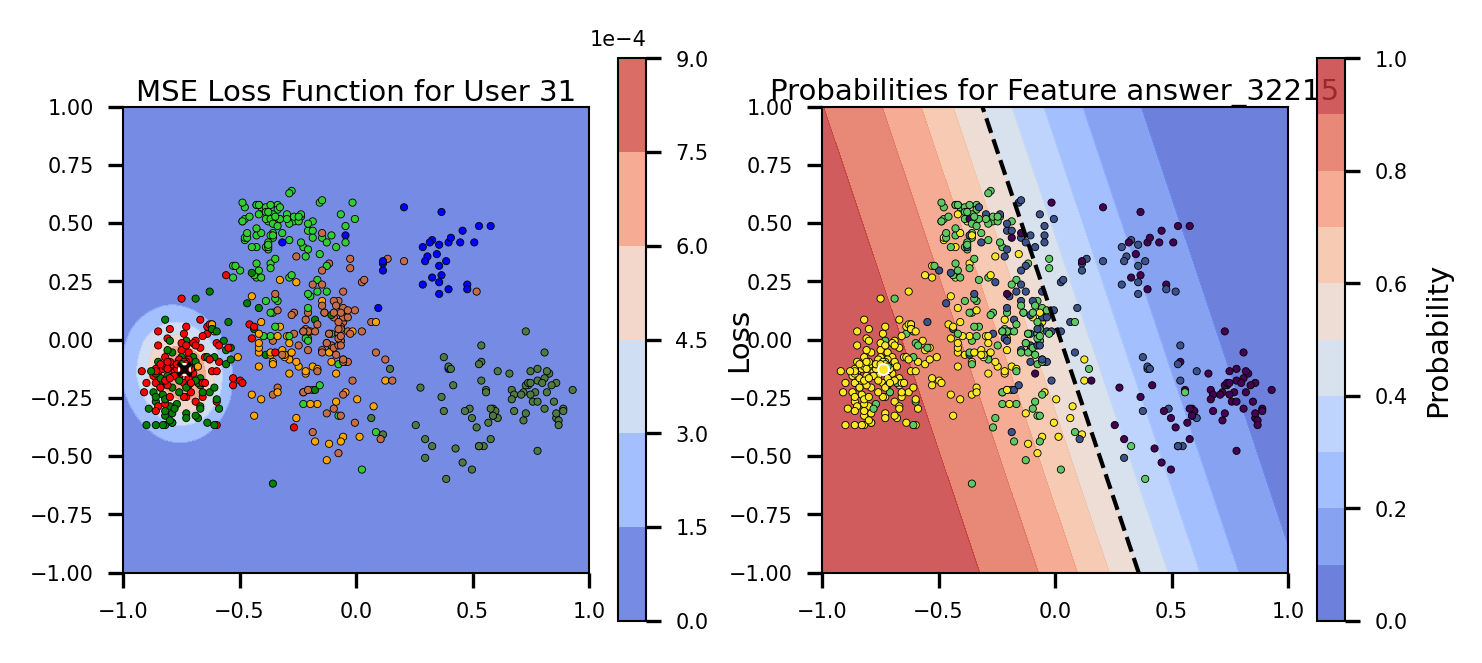

In [14]:
_ = show(n=1, q=q2)

Should Switzerland terminate the Schengen agreement with the EU and reintroduce more security checks directly on the border? [BePart question]
0.24487705401163923 0.7865755244755245


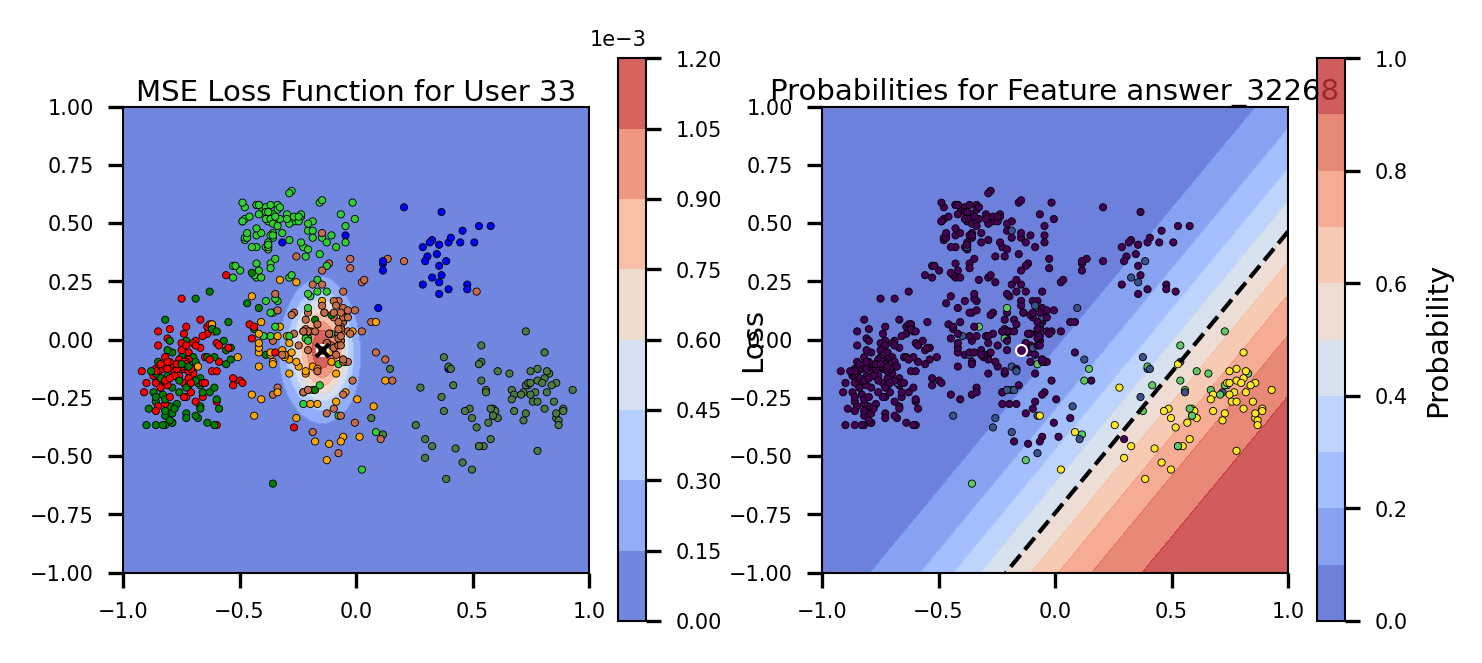

In [16]:
_ = show(n=2, q=q3)

Should busy sections of highways be widened?
0.24487705401163923 0.7865755244755245


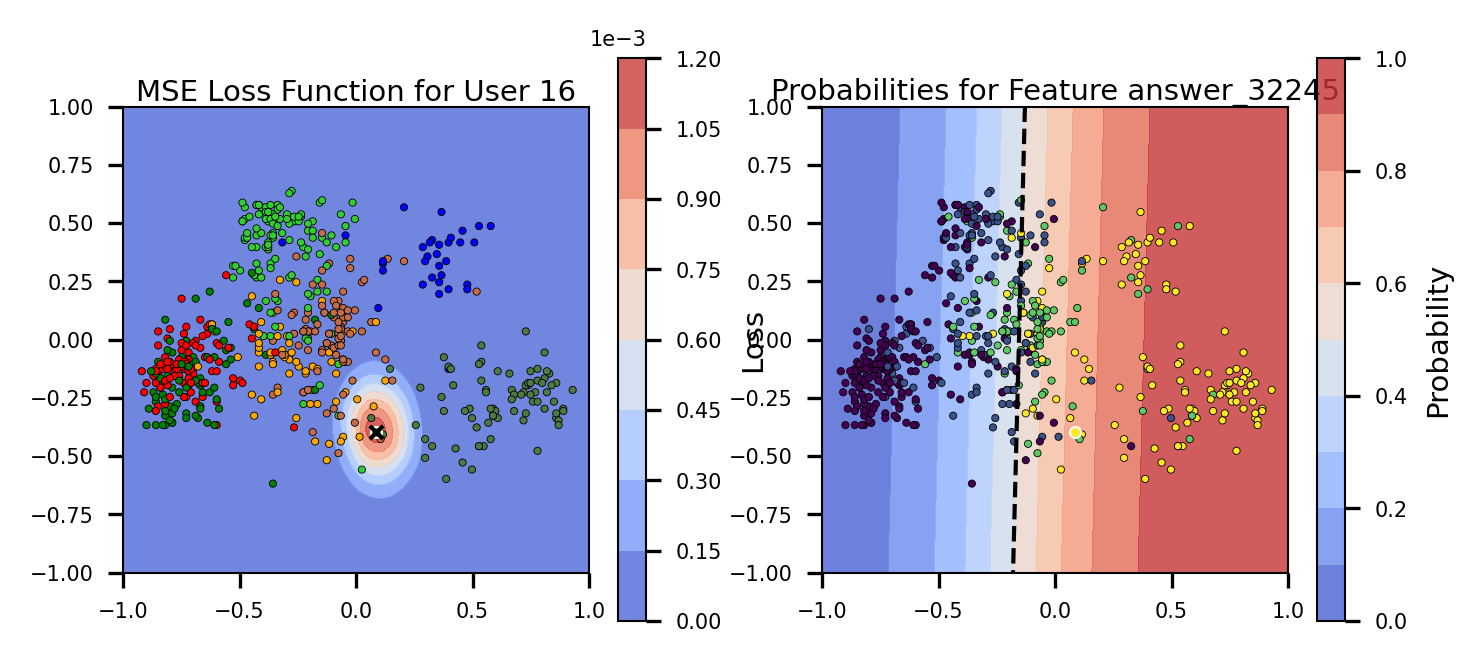

In [17]:
fig, _ = show(n=0, q=q4)
fig.savefig('../figures/questions.pdf')

In [18]:
questions = questions.merge(xplore.items, right_index=True, left_on='ID_question')
questions.to_csv('../src/data/csv/question_params.csv')
questions


,question_DE,question_EN,rapide,beta1,beta2,alpha
ID_question,,,,,,
answer_32214,Befürworten Sie eine Erhöhung des Rentenalters...,Do you support an increase in the retirement a...,1,1.817253,3.159123,-0.047741
answer_32215,Soll der Staat mehr Mittel für die Krankenkass...,Should the federal government allocate more fu...,1,-3.222970,-1.080782,-0.075510
answer_32216,Bei Ehepaaren ist die Höhe der Rente heute auf...,"For married couples, the pension is currently ...",0,-0.496590,-0.562496,-0.821258
answer_32217,Im Rahmen der BVG-Reform sollen die Renten gek...,As part of the reform of the BVG (occupational...,0,2.816033,3.668403,-0.905571
answer_32218,Soll die bezahlte Elternzeit von heute 14 Woch...,Should paid parental leave be increased beyond...,0,-4.286765,0.045105,-0.196909
...,...,...,...,...,...,...
answer_32284,"Soll der Bund im Bereich ""Öffentlicher Verkehr...",Should the federal government spend more or le...,0,-1.188250,-0.662473,-0.618517
answer_32285,"Soll der Bund im Bereich ""Strassenverkehr (mot...",Should the federal government spend more or le...,0,1.850353,0.229967,0.465115
answer_32286,"Soll der Bund im Bereich ""Öffentliche Sicherhe...",Should the federal government spend more or le...,0,0.698784,-0.136973,-0.266072


In [20]:
questions.loc['answer_32268']

question_DE    Soll die Schweiz das Schengen-Abkommen mit der...
question_EN    Should Switzerland terminate the Schengen agre...
rapide                                                         1
beta1                                                   3.756027
beta2                                                  -3.108126
alpha                                                   2.314773
Name: answer_32268, dtype: object

In [ ]:
-3.75/3.1 * 1 - 2.3/

In [13]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 200),np.linspace(-1, 1, 200))

def get_ellipse_params(P):
    # Assuming xx, yy, and P are defined as your grid and heatmap values
    mu_x = np.sum(P * xx) / np.sum(P)
    mu_y = np.sum(P * yy) / np.sum(P)

    sigma_xx = np.sum(P * (xx - mu_x)**2) / np.sum(P)
    sigma_yy = np.sum(P * (yy - mu_y)**2) / np.sum(P)
    sigma_xy = np.sum(P * (xx - mu_x) * (yy - mu_y)) / np.sum(P)

    # Covariance matrix
    cov_matrix = np.array([[sigma_xx, sigma_xy], [sigma_xy, sigma_yy]])

    # Eigenvalues for the ellipse
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Eigenvalues give you the variance along the axes of the ellipse
    # Eigenvectors give the rotation of the axes

    # Calculate width and height of the ellipse based on eigenvalues
    width, height = 2 * np.sqrt(eigenvalues)  # 2*sqrt(eigenvalues) gives 1 sigma distance

    # Calculate angle of ellipse from the eigenvectors
    angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
    angle_degrees = np.degrees(angle)

    return mu_x, mu_y, width, height, angle_degrees

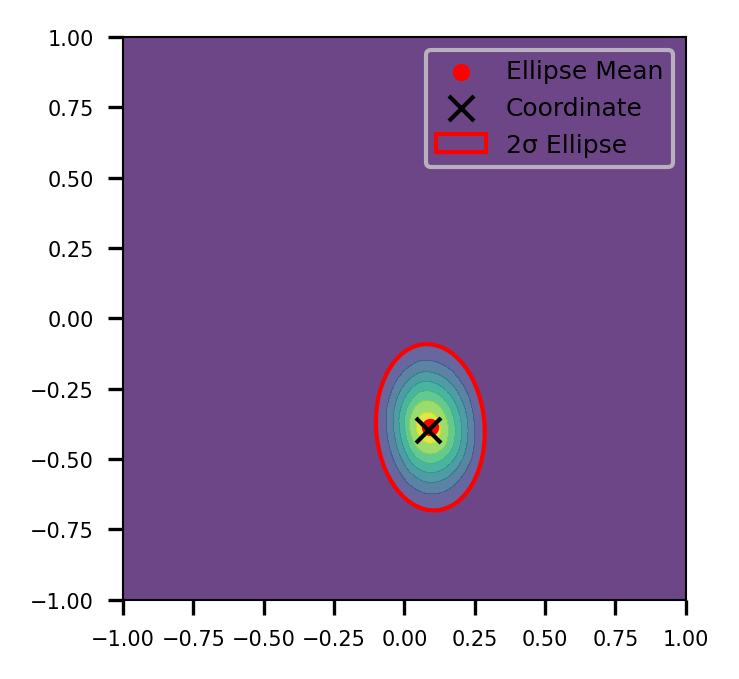

In [14]:
from matplotlib.patches import Ellipse

n = 0
s = 2
 
P = xplore.fit_posteriors.iloc[n].values.reshape((200,200))
mu_x, mu_y, width, height, angle_degrees = get_ellipse_params(P)
# Create an ellipse patch
ellipse = Ellipse(xy=(mu_x, mu_y), width=s*width, height=s*height, angle=angle_degrees,
                  edgecolor='red', fc='None', lw=1, label=f'{s}σ Ellipse')

# Plotting the ellipse over your heatmap
fig, ax = plt.subplots()
ax.contourf(xx, yy, P, alpha=0.8)  # Your heatmap data
ax.scatter(mu_x, mu_y, color='red', s=10, label="Ellipse Mean")  # Mean location
ax.scatter(xplore.embedding.iloc[n,0], xplore.embedding.iloc[n,1], marker='x', c='black', label='Coordinate')
ax.add_patch(ellipse)
ax.set_aspect('equal')
ax.legend()
plt.show()

In [ ]:
candidates[['x','y']] = xplore.embedding.values
candidates[['mu_x', 'mu_y', 'width', 'height', 'angle']] = xplore.fit_posteriors.apply(lambda row: get_ellipse_params(row.values.reshape((200,200))), axis=1, result_type='expand')
candidates.to_csv('../src/data/csv/candidates.csv')
candidates


,party_short,color,x,y,mu_x,mu_y,width,height,angle
16,GLP,#32CD32,0.085427,-0.396985,0.092042,-0.386780,0.192614,0.295833,-175.928981
31,SP,#FF0000,-0.738693,-0.125628,-0.756948,-0.146323,0.233534,0.329580,-174.898324
33,Die Mitte,#C56C46,-0.145729,-0.045226,-0.152688,-0.046806,0.173662,0.310245,-179.212170
41,GLP,#32CD32,-0.356784,0.457286,-0.353273,0.468202,0.176275,0.352144,-175.073151
42,Die Mitte,#C56C46,-0.356784,-0.005025,-0.364929,-0.012507,0.197671,0.306934,-171.703649
...,...,...,...,...,...,...,...,...,...
5905,Die Mitte,#C56C46,-0.115578,0.025126,-0.108110,0.021949,0.175929,0.310950,-179.137666
5908,GLP,#32CD32,-0.045226,0.417085,-0.039606,0.453762,0.185069,0.362250,-177.300565
5915,SVP,#4F7942,0.658291,-0.145729,0.656471,-0.162793,0.230306,0.314676,175.576418
5921,Die Mitte,#C56C46,-0.276382,0.105528,-0.279047,0.115624,0.182393,0.319760,-177.323526


### Combinations

In [16]:
possible_values    = [0, 1, 2, 3, float('nan')]
selected_questions = [q1,q2,q3,q4]

# Generate all possible combinations of the values for q1, q2, q3, and q4
combinations = pd.DataFrame(itertools.product(possible_values, repeat=len(selected_questions)), 
                            columns=selected_questions)

# Create a dataframe filled with NaN values
simulation = pd.DataFrame(np.nan, 
                           index=range(len(combinations)), 
                           columns=reactions.columns)

# Add columns for q1, q2, q3, q4 and populate them with the combinations
simulation[selected_questions] = combinations/3

In [17]:
from scipy.stats import norm, multivariate_normal

xplore.prior   = multivariate_normal([0,0], [[1,0], [0,1]])
xplore.prior_X = xplore.prior.pdf(xplore.X) / xplore.prior.pdf(xplore.X).sum()

def get_posteriors(user):
    answers = user.loc[~user.isna()]
    return xplore.posterior_X(answers)

posteriors = simulation.apply(get_posteriors, axis=1, result_type='expand')
combinations[['x', 'y']] = posteriors2coordinates(posteriors.values, area=xplore.area, r=xplore.r)
combinations[['mu_x', 'mu_y', 'width', 'height', 'angle']] = posteriors.apply(lambda row: get_ellipse_params(row.values.reshape(200,200)), axis=1, result_type='expand')
combinations.to_csv('../src/data/csv/combinations.csv')
combinations

,answer_32214,answer_32215,answer_32268,answer_32245,x,y,mu_x,mu_y,width,height,angle
0,0.0,0.0,0.0,0.0,-0.236181,-0.095477,-2.873091e-01,-4.743802e-02,0.665558,0.915146,-169.546657
1,0.0,0.0,0.0,1.0,-0.125628,-0.125628,-9.956468e-02,-7.540833e-02,0.750320,0.893976,-165.199299
2,0.0,0.0,0.0,2.0,0.015075,-0.165829,4.828052e-02,-9.572539e-02,0.725778,0.868816,-171.215899
3,0.0,0.0,0.0,3.0,0.206030,-0.185930,1.928087e-01,-1.090238e-01,0.675447,0.849794,-178.940991
4,0.0,0.0,0.0,NaN,0.095477,-0.175879,5.938933e-03,-8.505361e-02,0.804107,0.891250,-153.805947
...,...,...,...,...,...,...,...,...,...,...,...
620,NaN,NaN,NaN,0.0,-0.587940,0.015075,-4.308827e-01,9.295333e-03,0.744261,1.083738,178.934304
621,NaN,NaN,NaN,1.0,-0.326633,-0.025126,-1.488872e-01,2.595004e-03,0.984309,1.083851,178.255100
622,NaN,NaN,NaN,2.0,0.015075,0.015075,7.665138e-02,-1.763752e-03,0.974196,1.083879,178.122470
623,NaN,NaN,NaN,3.0,0.396985,-0.005025,3.107839e-01,-6.704468e-03,0.836565,1.083827,178.603784


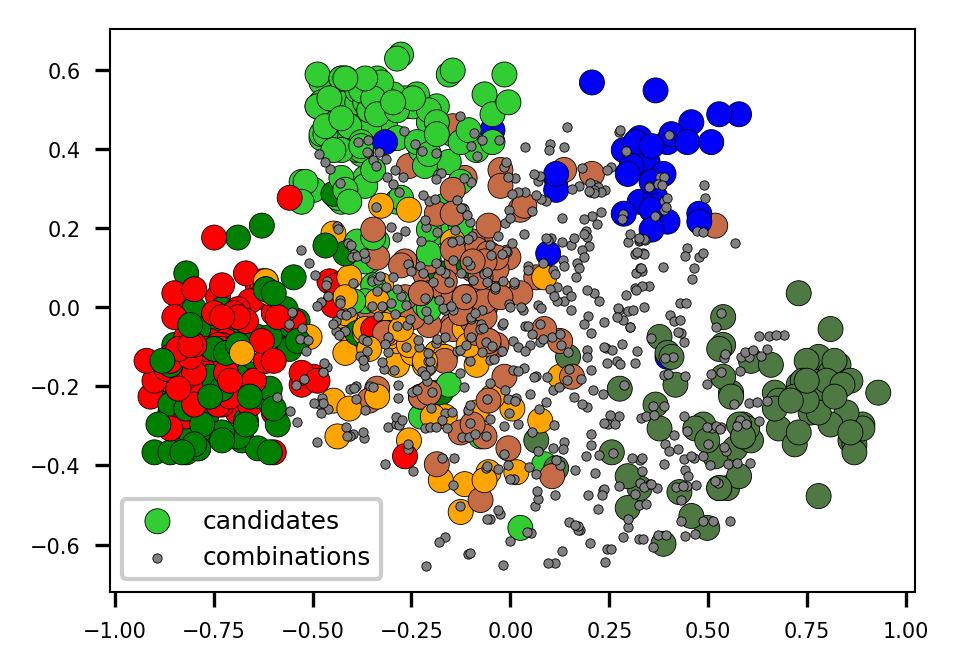

In [18]:
fig, ax  = plt.subplots()
params = {'zorder':2, 'edgecolors':'black', 'linewidths':0.2}
ax.scatter(candidates['x'],candidates['y'], c=candidates.color, **params, label='candidates')
# ax.scatter(combinations['x'],combinations['y'], c='grey', zorder=3, s=5, edgecolors='black', lw=0.2, label='combinations')
ax.scatter(combinations['mu_x'],combinations['mu_y'], c='grey', zorder=3, s=5, edgecolors='black', lw=0.2, label='combinations')
ax.set(aspect='equal')
legend = ax.legend(facecolor=(1, 1, 1, 0))
legend.get_frame().set_alpha(1)
plt.show()

In [19]:
combinations.loc[combinations.iloc[:,0].isna() &
                 combinations.iloc[:,1].isna() &
                 (combinations.iloc[:,2]==3) &
                 combinations.iloc[:,3].isna() ]

,answer_32214,answer_32215,answer_32268,answer_32245,x,y,mu_x,mu_y,width,height,angle
619,NaN,NaN,3.0,NaN,0.61809,-0.517588,0.457333,-0.376864,0.689215,0.941403,145.959805


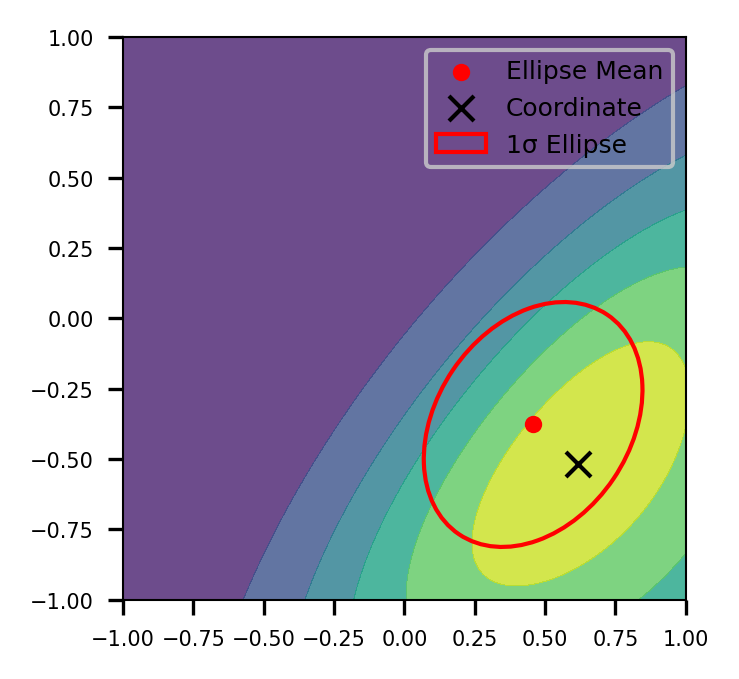

In [20]:
n = 619
s = 1
 
P = posteriors.iloc[n].values.reshape((200,200))
mu_x, mu_y, width, height, angle_degrees = get_ellipse_params(P)
# Create an ellipse patch
ellipse = Ellipse(xy=(mu_x, mu_y), width=s*width, height=s*height, angle=angle_degrees,
                  edgecolor='red', fc='None', lw=1, label=f'{s}σ Ellipse')

# Plotting the ellipse over your heatmap
fig, ax = plt.subplots()
ax.contourf(xx, yy, P, alpha=0.8)  # Your heatmap data
ax.scatter(mu_x, mu_y, color='red', s=10, label="Ellipse Mean")  # Mean location
ax.scatter(combinations.iloc[n,4], combinations.iloc[n,5], marker='x', c='black', label='Coordinate')
ax.add_patch(ellipse)
ax.set_aspect('equal')
ax.legend()
plt.show()

In [21]:
fig.savefig('../figures/combinations.pdf')

## Berechne x,y for Decision Boundaries

In [1]:
import pandas as pd

questions = pd.read_csv('../src/data/csv/question_params.csv', index_col=0)
questions

,question_DE,question_EN,rapide,beta1,beta2,alpha
ID_question,,,,,,
answer_32214,Befürworten Sie eine Erhöhung des Rentenalters...,Do you support an increase in the retirement a...,1,1.817253,3.159123,-0.047741
answer_32215,Soll der Staat mehr Mittel für die Krankenkass...,Should the federal government allocate more fu...,1,-3.222970,-1.080782,-0.075510
answer_32216,Bei Ehepaaren ist die Höhe der Rente heute auf...,"For married couples, the pension is currently ...",0,-0.496590,-0.562496,-0.821258
answer_32217,Im Rahmen der BVG-Reform sollen die Renten gek...,As part of the reform of the BVG (occupational...,0,2.816033,3.668403,-0.905571
answer_32218,Soll die bezahlte Elternzeit von heute 14 Woch...,Should paid parental leave be increased beyond...,0,-4.286765,0.045105,-0.196909
...,...,...,...,...,...,...
answer_32284,"Soll der Bund im Bereich ""Öffentlicher Verkehr...",Should the federal government spend more or le...,0,-1.188250,-0.662473,-0.618517
answer_32285,"Soll der Bund im Bereich ""Strassenverkehr (mot...",Should the federal government spend more or le...,0,1.850353,0.229967,0.465115
answer_32286,"Soll der Bund im Bereich ""Öffentliche Sicherhe...",Should the federal government spend more or le...,0,0.698784,-0.136973,-0.266072


In [ ]:
x = 1
values = -questions.beta1/questions.beta2 * x + questions.alpha/questions.beta2
values.loc['answer_32268']

0.4637050599464033